In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Import the file containing the data
df = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
#data description and distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
#summary statistics for the data 
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


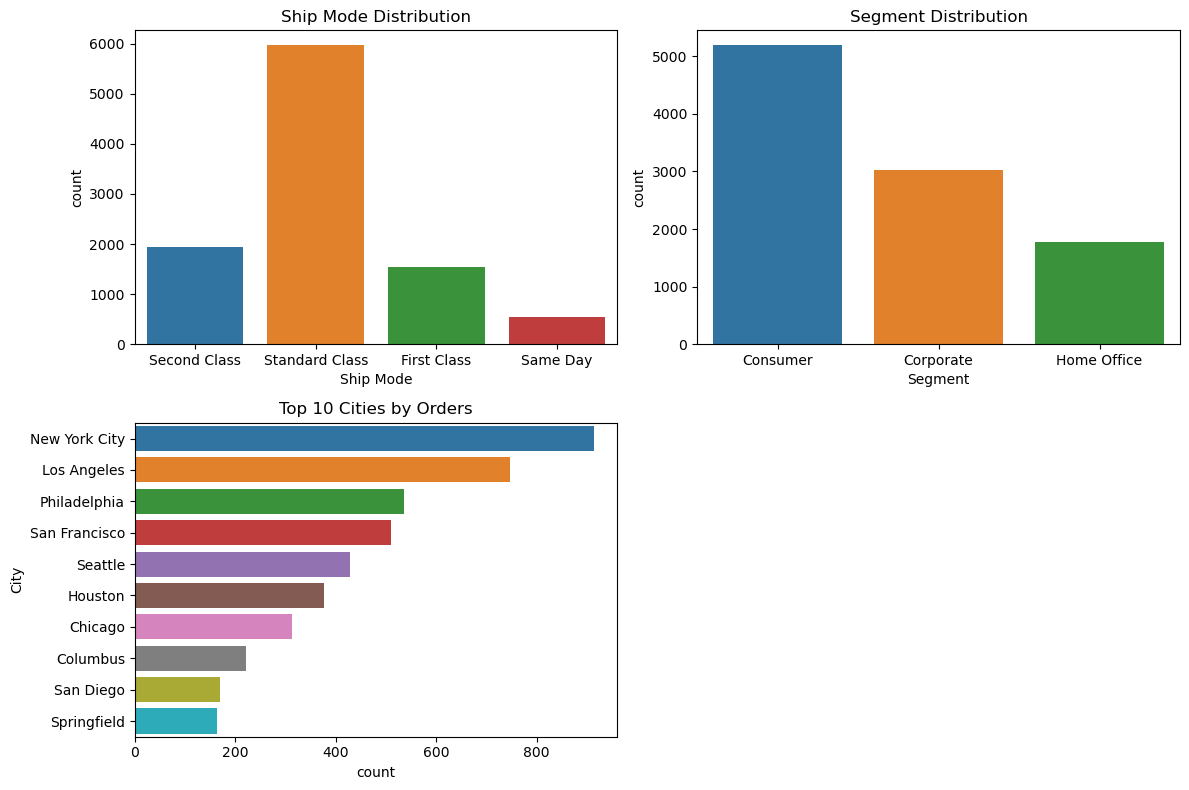

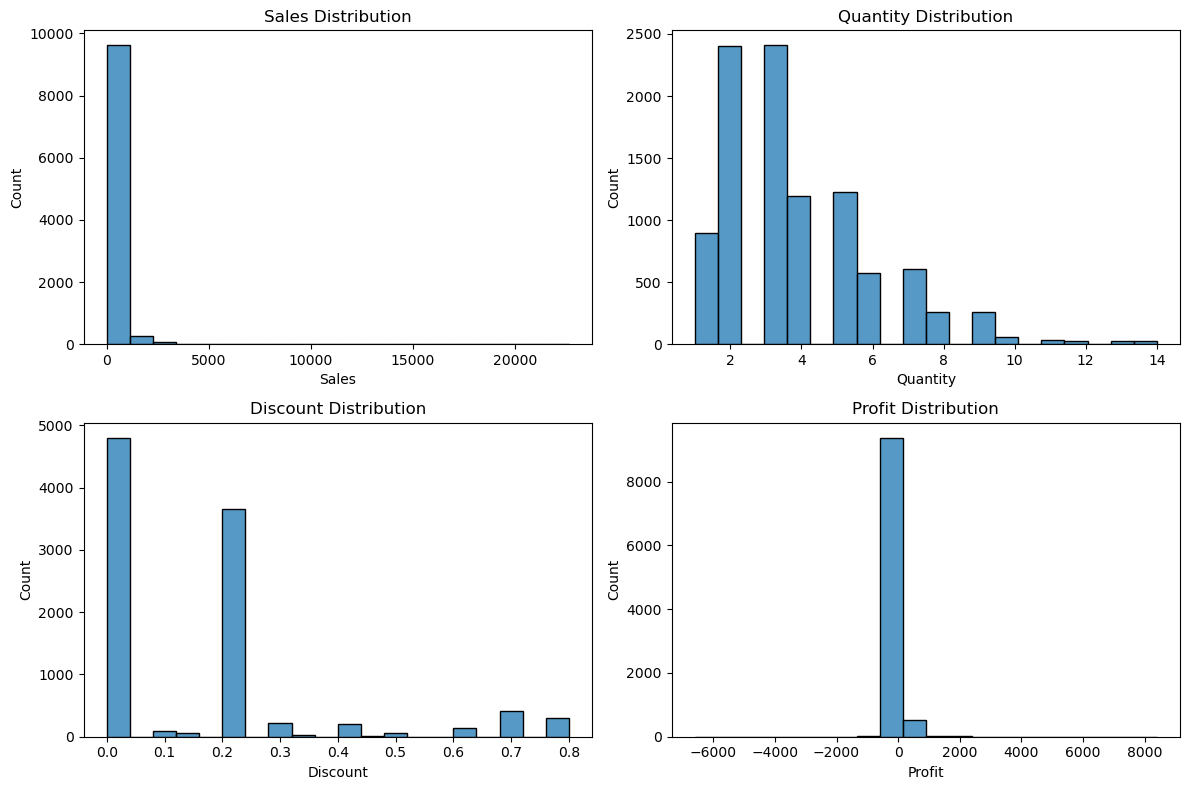

In [11]:
# Visualize ship mode, segment, and city
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Ship Mode')
plt.title('Ship Mode Distribution')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Segment')
plt.title('Segment Distribution')

plt.subplot(2, 2, 3)
sns.countplot(data=df, y='City', order=df['City'].value_counts().index[:10])
plt.title('Top 10 Cities by Orders')

plt.tight_layout()
plt.show()

# Visualize sales, quantity, discount, and profit
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Sales', bins=20)
plt.title('Sales Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Quantity', bins=20)
plt.title('Quantity Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Discount', bins=20)
plt.title('Discount Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Profit', bins=20)
plt.title('Profit Distribution')

plt.tight_layout()
plt.show()


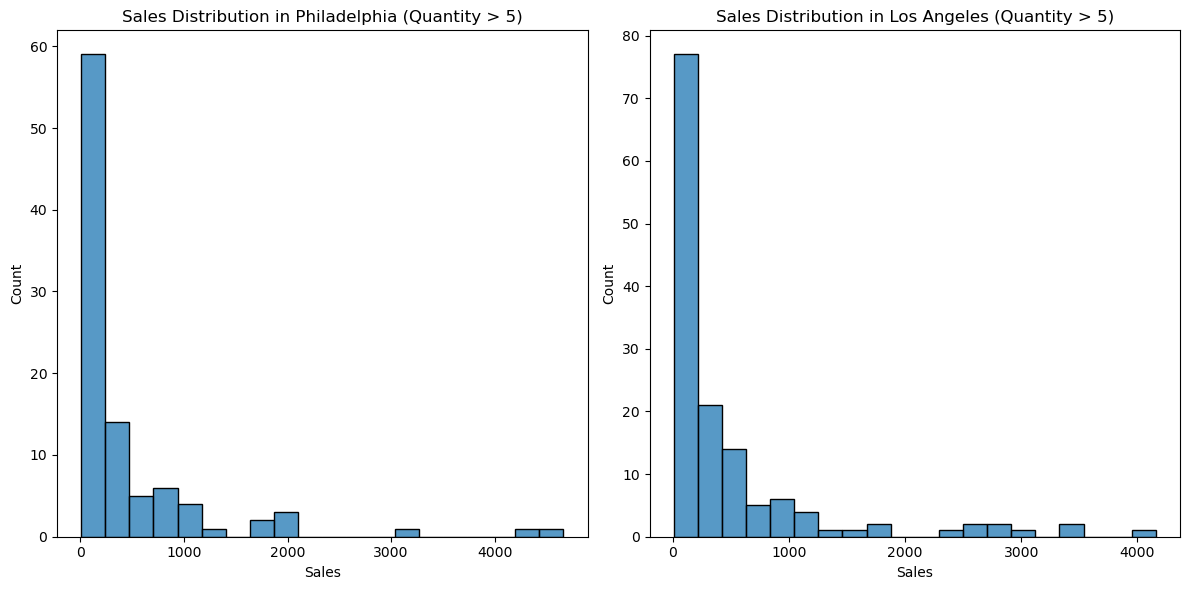

Summary Statistics for Philadelphia Subset:
count      97.000000
mean      443.861660
std       813.136394
min         6.858000
25%        30.992000
50%       100.240000
75%       470.155000
max      4663.736000
Name: Sales, dtype: float64
Summary Statistics for Los Angeles Subset:
count     140.000000
mean      470.582775
std       769.170730
min         9.024000
25%        45.360000
50%       170.748000
75%       481.935000
max      4158.912000
Name: Sales, dtype: float64


In [15]:
# Step 1: Split the data into subsets based on quantity and city
# Create subsets for cities 'New York' and 'Los Angeles' and quantities greater than 5
subset1 = df[(df['City'] == 'Philadelphia') & (df['Quantity'] > 5)]
subset2 = df[(df['City'] == 'Los Angeles') & (df['Quantity'] > 5)]

# Step 2: Calculate summary statistics for the sales distribution in each subset
summary_subset1 = subset1['Sales'].describe()
summary_subset2 = subset2['Sales'].describe()

# Step 3: Visualize the sales distribution in each subset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=subset1, x='Sales',bins=20)
plt.title('Sales Distribution in Philadelphia (Quantity > 5)')
plt.subplot(1, 2, 2)
sns.histplot(data=subset2, x='Sales',bins=20)
plt.title('Sales Distribution in Los Angeles (Quantity > 5)')
plt.tight_layout()
plt.show()

# Display summary statistics
print("Summary Statistics for Philadelphia Subset:")
print(summary_subset1)
print("Summary Statistics for Los Angeles Subset:")
print(summary_subset2)

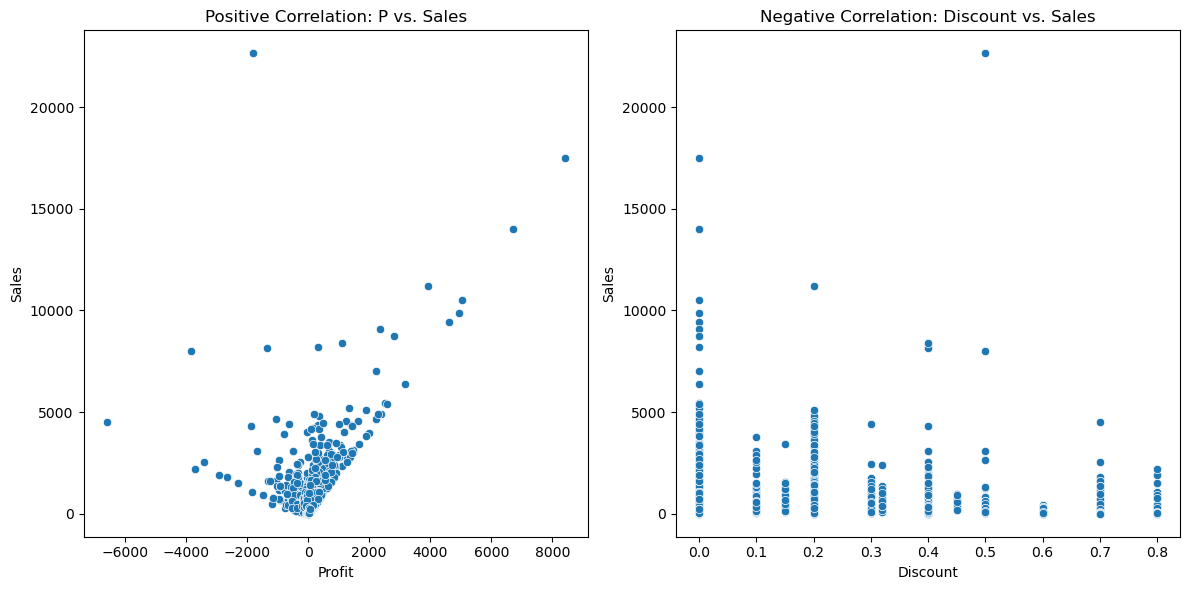

In [23]:
#Explore correlation- find the features that have the strongest positive and negative correlation with salesand produce plots representing these relationships
# Step 1:Filter the DataFrame to include only numeric columns
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Step 2: Identify the features with the strongest positive and negative correlations with 'Sales'
# Filter out the 'Sales' column
correlation_with_sales = correlation_matrix['Sales'].drop('Sales')

# Find the feature with the strongest positive correlation
strongest_positive_corr_feature = correlation_with_sales.idxmax()

strongest_negative_corr = correlation_matrix['Sales'].nsmallest(1).index

# Step 3: Create plots to represent these relationships
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x=strongest_positive_corr_feature, y='Sales')
plt.title(f'Positive Correlation: {strongest_positive_corr_feature[0]} vs. Sales')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x=strongest_negative_corr[0], y='Sales')
plt.title(f'Negative Correlation: {strongest_negative_corr[0]} vs. Sales')
plt.tight_layout()
plt.show()


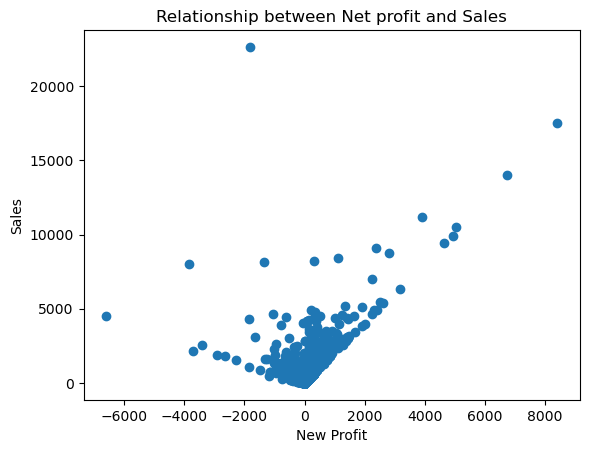

In [24]:
#Engineer and explore a new feature. Create a new feature, which reps the difference btn two significant columns, and plot the rship btn the new feature and sales.
# Step 1: Choose two significant columns
col1 = 'Profit'
col2 = 'Discount'

# Step 2: Create the new feature by subtracting one column from the other
df['Net_profit'] = df[col1] - df[col2]

# Step 3: Visualize the relationship between the new feature and sales
plt.scatter(df['Net_profit'], df['Sales'])
plt.xlabel('New Profit')
plt.ylabel('Sales')
plt.title('Relationship between Net profit and Sales')
plt.show()
